In [1]:
import requests
from bs4 import BeautifulSoup 

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import re
from pprint import pprint

from wordcloud import WordCloud

import os
import json

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from prepare import *

import nltk
import nltk.sentiment

import warnings


In [2]:
warnings.filterwarnings('ignore')
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
sia = nltk.sentiment.SentimentIntensityAnalyzer()

# Acquire

In [3]:
data = pd.read_json('data.json')

In [4]:
data.head()

,repo,language,readme_contents
0,thedaviddias/Front-End-Checklist,None,"<h1 align=""center"">\n<br>\n <img src=""https:/..."
1,onevcat/Kingfisher,Swift,"<p align=""center"">\n<img src=""https://raw.gith..."
2,FallibleInc/security-guide-for-developers,None,# 实用性 WEB 开发人员安全须知 \n\n### 目标读者 \n\n安全问题主要由以...
3,tailwindlabs/tailwindcss,JavaScript,"<p>\n <a href=""https://tailwindcss.com/"" ta..."
4,codepath/android_guides,None,# CodePath Android Cliffnotes\n\nWelcome to th...


# Prepare

In [5]:
data.isna().sum()

repo                0
language           54
readme_contents     0
dtype: int64

In [6]:
# removed languages that were 'none'
data = data.dropna()

In [7]:
len(data)

506

In [8]:
data.language.value_counts()

JavaScript          141
Python               59
Java                 46
TypeScript           45
Go                   36
C++                  30
C                    20
Shell                13
Swift                13
HTML                 12
Rust                 11
Ruby                  9
Kotlin                9
C#                    9
PHP                   6
Vue                   6
Jupyter Notebook      6
Vim script            6
CSS                   5
Objective-C           3
Haskell               2
Elixir                2
Lua                   2
TeX                   2
CoffeeScript          2
AsciiDoc              1
Makefile              1
Standard ML           1
Clojure               1
Crystal               1
Dockerfile            1
Batchfile             1
Rascal                1
Dart                  1
OCaml                 1
Emacs Lisp            1
Name: language, dtype: int64

In [9]:
# brought the dataset down to those languages that were more than or equal to 30
data = data[data['language'].map(data['language'].value_counts()) >= 30]

In [10]:
len(data)

357

<AxesSubplot:>

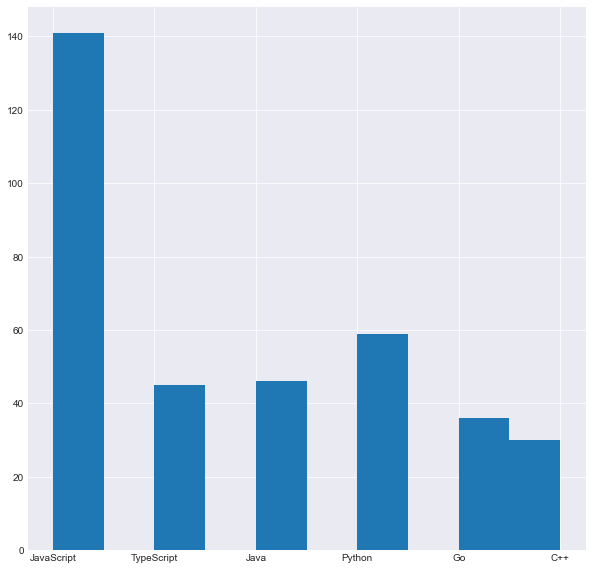

In [11]:
plt.figure(figsize=(10, 10))
data.language.hist(align = 'mid')

In [12]:
data.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [13]:
data = prep_readme_data(df= data, column = 'readme_contents', extra_words=['https','p','com','http','href'], exclude_words=[])

In [14]:
data = data.drop(columns = ['readme_contents'])

In [15]:
data = get_columns(data)

In [16]:
def is_javascript(row):
    if row['language'] == 'JavaScript':
        return True
    else:
        return False

In [17]:
data['is_javascript'] = data.apply(lambda row: is_javascript(row), axis=1)

In [18]:
data['sentiment'] = data.clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [19]:
data

,repo,language,clean,stemmed,lemmatized,message_length,word_count,avg_word_length,is_javascript,sentiment
3,tailwindlabs/tailwindcss,JavaScript,h r e f h l w n c c r g e b l n k g l l w n c ...,h r e f h l w n c c r g e b l n k g l l w n c ...,h r e f h l w n c c r g e b l n k g l l w n c ...,1013,507,1.998028,True,0.0
5,github/fetch,JavaScript,w n w f e c h l f l l h e f e c h f n c n r e ...,w n w f e c h l f l l h e f e c h f n c n r e ...,w n w f e c h l f l l h e f e c h f n c n r e ...,8223,4112,1.999757,True,0.0
7,ianstormtaylor/slate,TypeScript,l g n c e n e r h r e f g r c c g e b n n e r ...,l g n c e n e r h r e f g r c c g e b n n e r ...,l g n c e n e r h r e f g r c c g e b n n e r ...,8389,4195,1.999762,False,0.0
8,Kong/insomnia,JavaScript,n n r e c l e n l c k c h n n e l h c h n n r ...,n n r e c l e n l c k c h n n e l h c h n n r ...,n n r e c l e n l c k c h n n e l h c h n n r ...,2969,1485,1.999327,True,0.0
9,CymChad/BaseRecyclerViewAdapterHelper,Java,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,2163,1082,1.999076,False,0.0
...,...,...,...,...,...,...,...,...,...,...
551,TheAlgorithms/Java,Java,h g h b c h e l g r h j v r e e e v e l e n j ...,h g h b c h e l g r h j v r e e e v e l e n j ...,h g h b c h e l g r h j v r e e e v e l e n j ...,4023,2012,1.999503,False,0.0
555,tornadoweb/tornado,Python,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,1009,505,1.998020,False,0.0
557,gulpjs/gulp,JavaScript,l g n c e n e r h r e f h g l j c g h e g h 2 ...,l g n c e n e r h r e f h g l j c g h e g h 2 ...,l g n c e n e r h r e f h g l j c g h e g h 2 ...,6303,3152,1.999683,True,0.0
558,alibaba/weex,C++,w e e x f r e w r k f r b l n g b l e c r l f ...,w e e x f r e w r k f r b l n g b l e c r l f ...,w e e x f r e w r k f r b l n g b l e c r l f ...,793,397,1.997481,False,0.0


# Explore 

In [20]:
data.language.value_counts(normalize = True)

JavaScript    0.394958
Python        0.165266
Java          0.128852
TypeScript    0.126050
Go            0.100840
C++           0.084034
Name: language, dtype: float64

In [21]:
data.language.value_counts()

JavaScript    141
Python         59
Java           46
TypeScript     45
Go             36
C++            30
Name: language, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 3 to 559
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repo             357 non-null    object 
 1   language         357 non-null    object 
 2   clean            357 non-null    object 
 3   stemmed          357 non-null    object 
 4   lemmatized       357 non-null    object 
 5   message_length   357 non-null    int64  
 6   word_count       357 non-null    int64  
 7   avg_word_length  355 non-null    float64
 8   is_javascript    357 non-null    bool   
 9   sentiment        357 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 28.2+ KB


In [23]:
data.describe()

,message_length,word_count,avg_word_length,sentiment
count,357.000000,357.000000,355.000000,357.0
mean,10680.030812,5340.512605,1.997631,0.0
std,19080.104081,9540.053613,0.020783,0.0
min,0.000000,0.000000,1.666667,0.0
25%,2621.000000,1311.000000,1.999242,0.0
50%,4739.000000,2370.000000,1.999581,0.0
75%,8773.000000,4387.000000,1.999772,0.0
max,150723.000000,75362.000000,1.999987,0.0


In [24]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [25]:
# combine all messages in single string by label

JavaScript_words = clean(' '.join(data[data.language == 'JavaScript'].stemmed))
Python_words = clean(' '.join(data[data.language == 'Python'].stemmed))
TS_words = clean(' '.join(data[data.language == 'TypeScript'].stemmed))
Java_words = clean(' '.join(data[data.language == 'Java'].stemmed))
Go_words = clean(' '.join(data[data.language == 'Go'].stemmed))
C_words = clean(' '.join(data[data.language == 'C++'].stemmed))
Non_JavaScript = clean(' '.join(data[data.language != 'JavaScript'].stemmed))
all_words = clean(' '.join(data.stemmed))

In [26]:
# making a df for each language 
js_df = data[data.language == 'JavaScript']
python_df = data[data.language == 'Python']
java_df = data[data.language == 'Java']
ts_df = data[data.language == 'TypeScript']
go_df = data[data.language == 'Go']
c_df = data[data.language == 'C++']

In [27]:
TS_freq = pd.Series(TS_words.split()).value_counts()
TS_freq

e    31942
r    19899
n    17282
c    15700
h    13436
l    12668
g     8848
b     7989
f     4859
w     4415
v     4065
k     3064
x     1884
0     1721
4     1588
j     1568
1     1375
2     1364
6     1130
3      863
5      818
q      781
8      702
9      661
z      656
7      499
dtype: int64

In [28]:
#Represent text as word frequencies
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
Python_freq = pd.Series(Python_words.split()).value_counts()
Java_freq = pd.Series(Java_words.split()).value_counts()
Go_freq = pd.Series(Go_words.split()).value_counts()
C_freq = pd.Series(C_words.split()).value_counts()
TS_freq = pd.Series(TS_words.split()).value_counts()
non_JavaScript_freq = pd.Series(Non_JavaScript.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [29]:
word_counts = pd.concat([JavaScript_freq, Python_freq, Java_freq, Go_freq, C_freq, TS_freq,non_JavaScript_freq, all_words_freq], axis = 1).fillna(0).astype(int)
word_counts.columns = ['javascript','python','java','go','c','ts','NonJS','all']
word_counts.head()

,javascript,python,java,go,c,ts,NonJS,all
e,186887,78504,30631,37548,24332,31942,202957,389844
r,109992,46286,18899,21756,14370,19899,121210,231202
n,100912,49293,18541,17496,15848,17282,118460,219372
c,78569,30682,15863,14254,11395,15700,87894,166463
l,73956,33457,14207,14181,10538,12668,85051,159007


In [30]:
word_counts.sort_values('all', ascending = False).head(20)

,javascript,python,java,go,c,ts,NonJS,all
e,186887,78504,30631,37548,24332,31942,202957,389844
r,109992,46286,18899,21756,14370,19899,121210,231202
n,100912,49293,18541,17496,15848,17282,118460,219372
c,78569,30682,15863,14254,11395,15700,87894,166463
l,73956,33457,14207,14181,10538,12668,85051,159007
h,61609,27387,13400,13008,8827,13436,76058,137667
g,45263,19105,10519,11188,6070,8848,55730,100993
b,39161,14750,8434,6692,5383,7989,43248,82409
f,31438,14679,5288,6951,4297,4859,36074,67512
w,29290,11278,4488,3693,3547,4415,27421,56711


In [31]:
word_counts.sort_values(['NonJS','javascript'],ascending = [True,False]).head(20)

,javascript,python,java,go,c,ts,NonJS,all
z,3322,1271,1080,641,507,656,4155,7477
q,4111,1410,994,819,520,781,4524,8635
9,4249,784,1729,1646,372,661,5192,9441
7,4720,885,1440,2463,369,499,5656,10376
8,6068,1021,2004,1758,439,702,5924,11992
6,4339,1037,1560,1956,495,1130,6178,10517
3,5622,1442,1930,2085,667,863,6987,12609
5,4752,1299,1697,2854,484,818,7152,11904
j,11297,2086,2442,423,1222,1568,7741,19038
4,5455,1204,1889,2434,905,1588,8020,13475


In [32]:
word_counts.sort_values(['javascript','NonJS'],ascending = [True,False]).head(20)

,javascript,python,java,go,c,ts,NonJS,all
z,3322,1271,1080,641,507,656,4155,7477
q,4111,1410,994,819,520,781,4524,8635
9,4249,784,1729,1646,372,661,5192,9441
6,4339,1037,1560,1956,495,1130,6178,10517
7,4720,885,1440,2463,369,499,5656,10376
5,4752,1299,1697,2854,484,818,7152,11904
4,5455,1204,1889,2434,905,1588,8020,13475
3,5622,1442,1930,2085,667,863,6987,12609
8,6068,1021,2004,1758,439,702,5924,11992
2,7636,2563,3252,2306,1097,1364,10582,18218


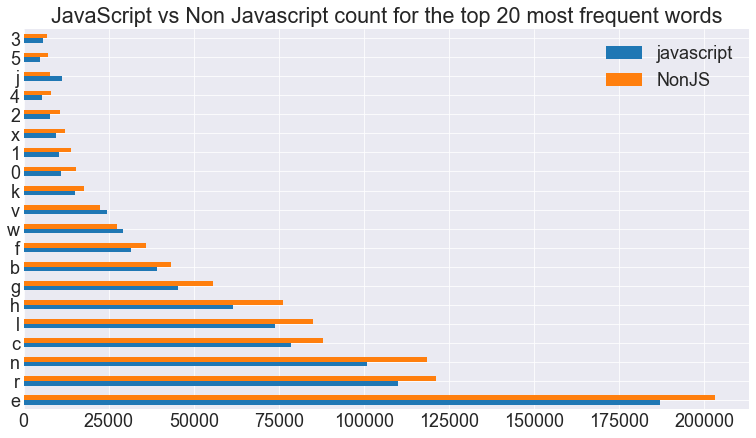

In [33]:
plt.rc('font', size=18)
word_counts.sort_values('NonJS', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

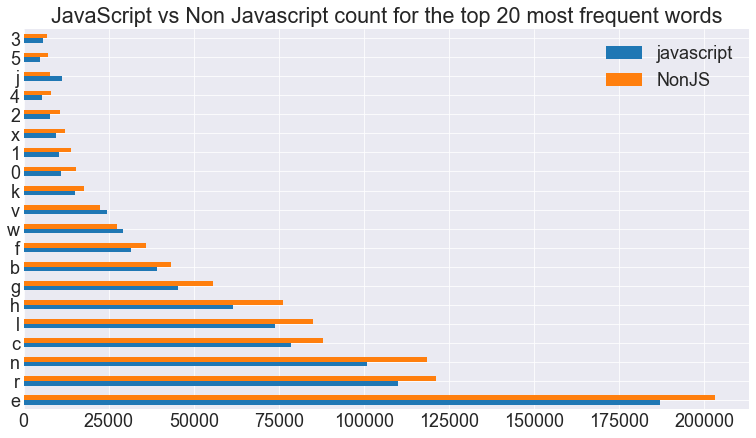

In [34]:
plt.rc('font', size=18)
word_counts.sort_values('NonJS', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

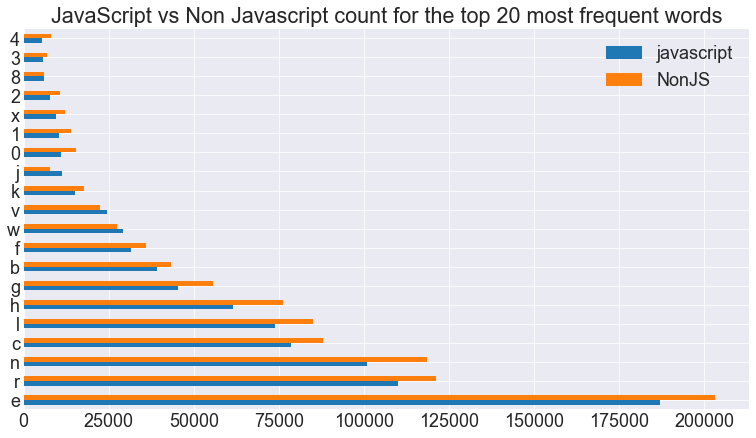

In [35]:
plt.rc('font', size=18)
word_counts.sort_values('javascript', ascending=False).head(20)[['javascript','NonJS']].plot.barh()
plt.title('JavaScript vs Non Javascript count for the top 20 most frequent words')
plt.show()

<Figure size 1152x648 with 0 Axes>

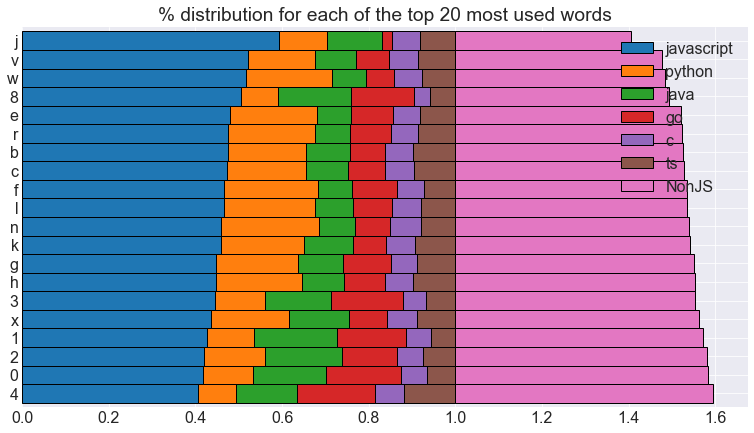

In [36]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'javascript')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% distribution for each of the top 20 most used words')
plt.show()

Text(0.5, 1.0, 'Top 10 most common Non JavaScript bigrams')

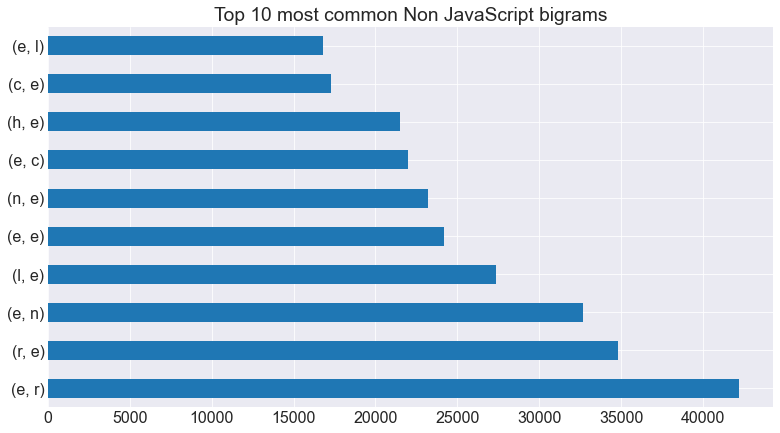

In [37]:
pd.Series(nltk.bigrams(Non_JavaScript.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Non JavaScript bigrams')

Text(0.5, 1.0, 'Top 10 most common JavaScript bigrams')

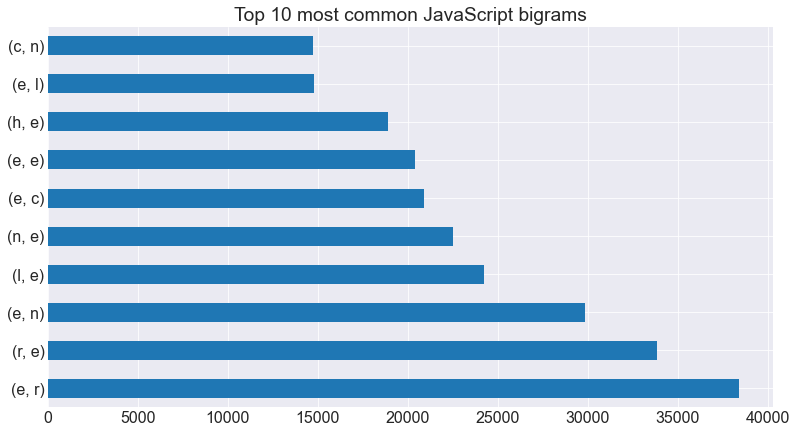

In [38]:
pd.Series(nltk.bigrams(JavaScript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common JavaScript bigrams')

Text(0.5, 1.0, 'Top 10 most common Java bigrams')

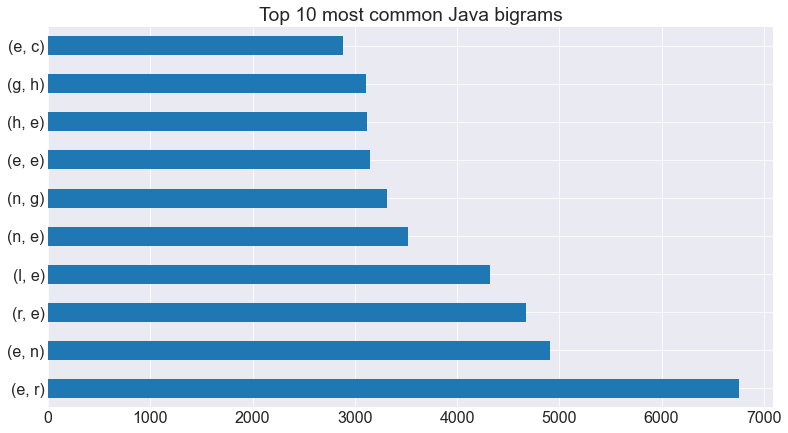

In [39]:
pd.Series(nltk.bigrams(Java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams')

Text(0.5, 1.0, 'Top 10 most common Python bigrams')

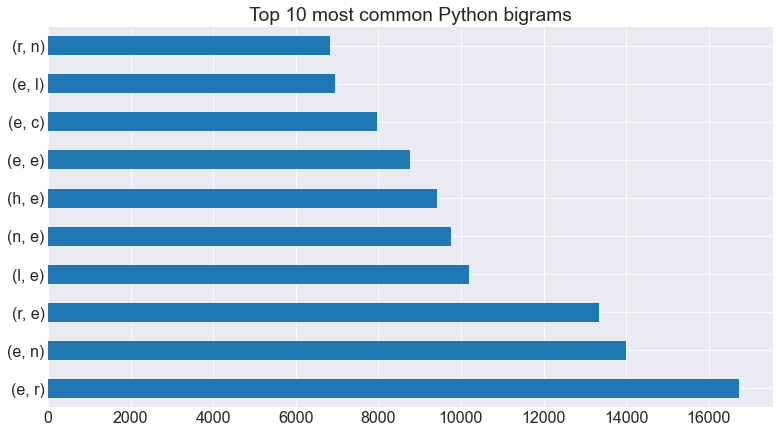

In [40]:
pd.Series(nltk.bigrams(Python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams')

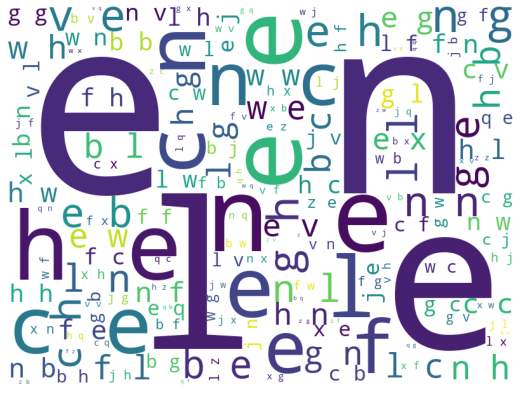

In [41]:
img = WordCloud(background_color='white', width=800, height=600).generate(JavaScript_words)
plt.imshow(img)
plt.axis('off')
plt.show()

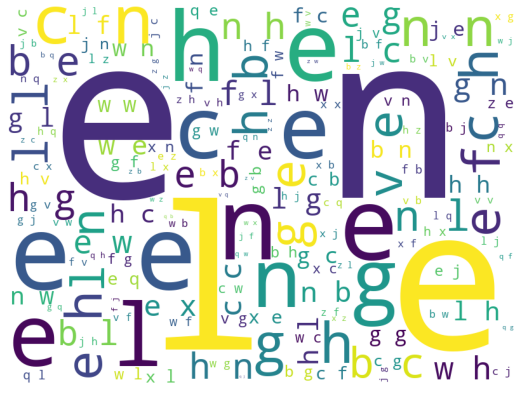

In [42]:
img = WordCloud(background_color='white', width=800, height=600).generate(Non_JavaScript)
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
# Might decide to return to prepare to take out 'use'

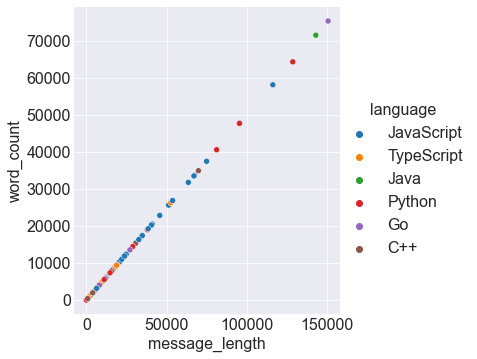

In [44]:
sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'language')

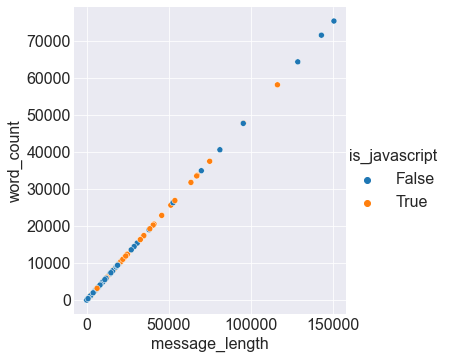

In [45]:
sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'is_javascript')

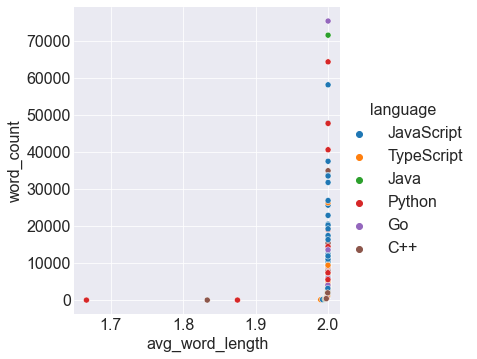

In [46]:
sns.relplot(data = data, x = 'avg_word_length', y = 'word_count', hue = 'language')

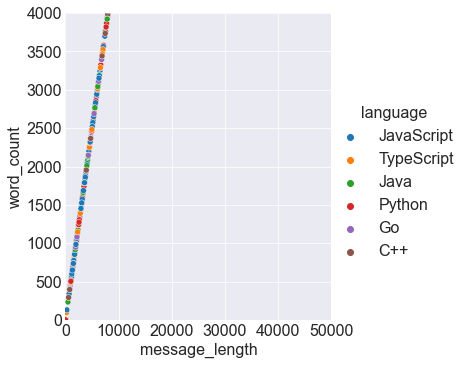

In [47]:
plot = sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'language')
plot.set(ylim=(0, 4000))
plot.set(xlim=(0,50000))

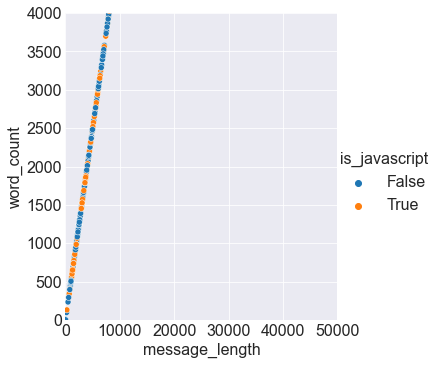

In [48]:
plot = sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'is_javascript')
plot.set(ylim=(0, 4000))
plot.set(xlim=(0,50000))

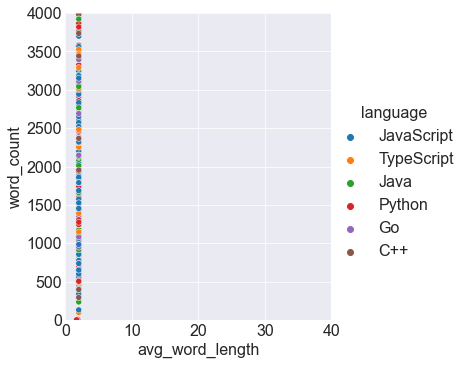

In [49]:
plot = sns.relplot(data = data, x = 'avg_word_length', y = 'word_count', hue = 'language')
plot.set(ylim=(0, 4000))
plot.set(xlim=(0,40))

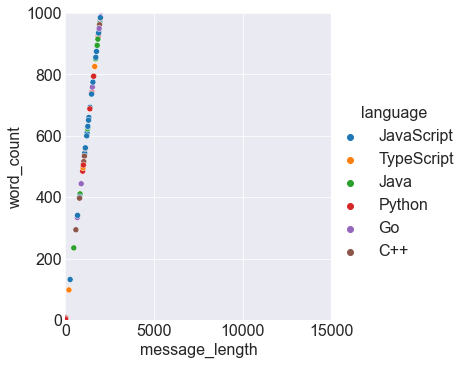

In [50]:
plot = sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'language')
plot.set(ylim=(0, 1000))
plot.set(xlim=(0,15000))

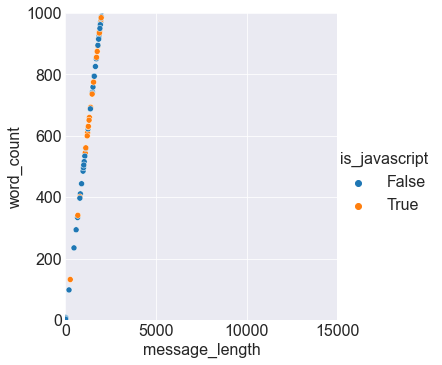

In [51]:
plot = sns.relplot(data = data, x = 'message_length', y = 'word_count', hue = 'is_javascript')
plot.set(ylim=(0, 1000))
plot.set(xlim=(0,15000))

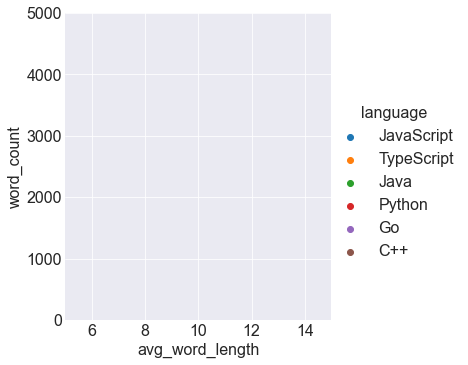

In [52]:
plot = sns.relplot(data = data, x = 'avg_word_length', y = 'word_count', hue = 'language')
plot.set(ylim=(0, 5000))
plot.set(xlim=(5,15))

In [53]:
data.groupby('language')['message_length','word_count','sentiment'].agg(['mean','median'])

message_length          word_count         sentiment       
                     mean median         mean  median      mean median
language                                                              
C++           8121.200000   3978  4061.100000  1989.5       0.0    0.0
Go           10174.416667   4013  5087.694444  2007.0       0.0    0.0
Java          7886.739130   3522  3943.869565  1761.5       0.0    0.0
JavaScript   12680.787234   5587  6340.893617  2794.0       0.0    0.0
Python       12392.050847   6191  6196.525424  3096.0       0.0    0.0
TypeScript    7132.088889   5427  3566.533333  2714.0       0.0    0.0

In [54]:
data.groupby('is_javascript').agg(['mean','median'])

message_length          word_count        avg_word_length  \
                        mean median         mean median            mean   
is_javascript                                                             
False            9373.981481   4503  4687.486111   2252        1.996443   
True            12680.787234   5587  6340.893617   2794        1.999435   

                        sentiment         
                 median      mean median  
is_javascript                             
False          1.999559       0.0    0.0  
True           1.999642       0.0    0.0

**Takeaway**
Java Script 

In [55]:
data

,repo,language,clean,stemmed,lemmatized,message_length,word_count,avg_word_length,is_javascript,sentiment
3,tailwindlabs/tailwindcss,JavaScript,h r e f h l w n c c r g e b l n k g l l w n c ...,h r e f h l w n c c r g e b l n k g l l w n c ...,h r e f h l w n c c r g e b l n k g l l w n c ...,1013,507,1.998028,True,0.0
5,github/fetch,JavaScript,w n w f e c h l f l l h e f e c h f n c n r e ...,w n w f e c h l f l l h e f e c h f n c n r e ...,w n w f e c h l f l l h e f e c h f n c n r e ...,8223,4112,1.999757,True,0.0
7,ianstormtaylor/slate,TypeScript,l g n c e n e r h r e f g r c c g e b n n e r ...,l g n c e n e r h r e f g r c c g e b n n e r ...,l g n c e n e r h r e f g r c c g e b n n e r ...,8389,4195,1.999762,False,0.0
8,Kong/insomnia,JavaScript,n n r e c l e n l c k c h n n e l h c h n n r ...,n n r e c l e n l c k c h n n e l h c h n n r ...,n n r e c l e n l c k c h n n e l h c h n n r ...,2969,1485,1.999327,True,0.0
9,CymChad/BaseRecyclerViewAdapterHelper,Java,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,h e r g e g h b e r c n e n c 7 6 9 8 2 0 9 3 ...,2163,1082,1.999076,False,0.0
...,...,...,...,...,...,...,...,...,...,...
551,TheAlgorithms/Java,Java,h g h b c h e l g r h j v r e e e v e l e n j ...,h g h b c h e l g r h j v r e e e v e l e n j ...,h g h b c h e l g r h j v r e e e v e l e n j ...,4023,2012,1.999503,False,0.0
555,tornadoweb/tornado,Python,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,r n w e b e r v e r g e h b g e g e r j n 2 0 ...,1009,505,1.998020,False,0.0
557,gulpjs/gulp,JavaScript,l g n c e n e r h r e f h g l j c g h e g h 2 ...,l g n c e n e r h r e f h g l j c g h e g h 2 ...,l g n c e n e r h r e f h g l j c g h e g h 2 ...,6303,3152,1.999683,True,0.0
558,alibaba/weex,C++,w e e x f r e w r k f r b l n g b l e c r l f ...,w e e x f r e w r k f r b l n g b l e c r l f ...,w e e x f r e w r k f r b l n g b l e c r l f ...,793,397,1.997481,False,0.0


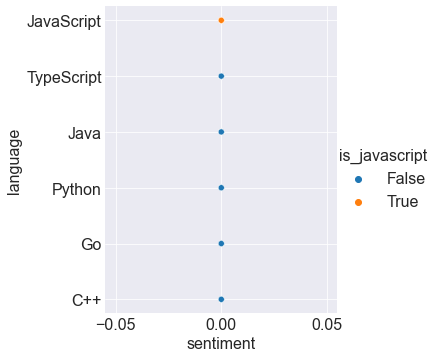

In [56]:
plot = sns.relplot(data = data, x = 'sentiment', y = 'language', hue = 'is_javascript')